In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
df = pd.read_csv('height-weight.csv')

In [7]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


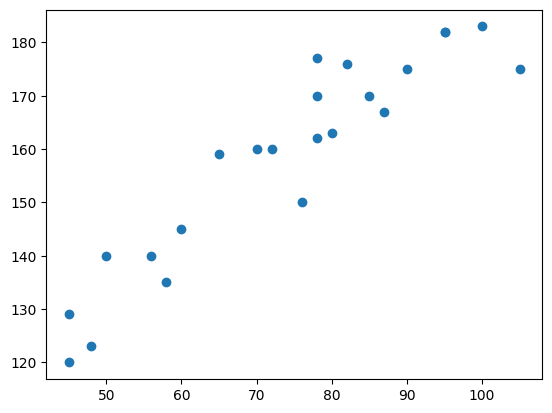

In [8]:
# scatter plot
plt.scatter(df['Weight'], df['Height'])

In [9]:
# finding correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [10]:
import seaborn as sns

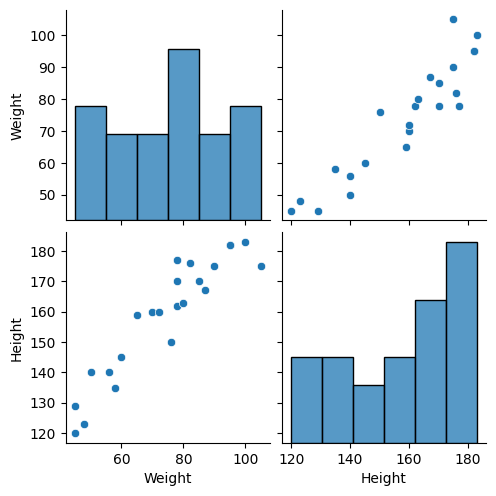

In [11]:
sns.pairplot(df)

In [12]:
# if there is multicollinearity , that means more than one independent variable is correlated to dependent variable, then we can use any one of them to predict the dependent variable.

In [13]:
X = df[['Weight']]
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [14]:
Y = df['Height']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [16]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# we use transform here because we want to use the same mean and standard deviation which we used for X_train
#  if we use fit_transform here, then it will calculate mean and standard deviation for X_test again which is not correct
# because we dont want any kind of data leakage
X_test = scaler.transform(X_test)

In [17]:
X_test

array([[ 0.2785895 ],
       [ 0.2785895 ],
       [-1.70918423],
       [ 1.30259415],
       [-0.50447288],
       [ 1.90494982],
       [-0.92612185]])

In [20]:
# now apply linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression(n_jobs=-1)

In [21]:
model.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [23]:
print("Coeff or slope:",model.coef_)
print("Intercept:",model.intercept_)

Coeff or slope: [17.03207732]
Intercept: 157.8125


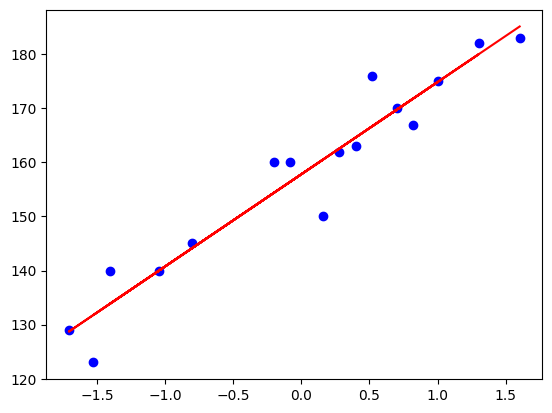

In [25]:
# plot trainig data  plot best fit line
plt.scatter(X_train, Y_train, color='blue')
plt.plot(X_train, model.predict(X_train), color='red')

In [26]:
# prediction for test data
Y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
rmse = np.sqrt(mse)

In [28]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Absolute Error: 9.237776679921925
Mean Squared Error: 103.09818711844574
Root Mean Squared Error: 10.153727744944009
R^2 Score: 0.7828485570493535


In [29]:
adjusted_r2 = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)

In [30]:
print(adjusted_r2)

0.7725080121469418
